### We need to extract file name from this url : ie : housing.tgz

In [19]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"

In [20]:
# conventional method
name =  []
for i in range(len(url)-1, -1, -1):
    if url[i] == "/":
        break
    name.append(url[i])

" ".join(name[::-1])

    

'h o u s i n g . t g z'

In [21]:
# simple method
import os
os.path.basename(url)

'housing.tgz'

In [2]:
# suppose we only have the file path like
file_path = r"C:\Users\rkt7k\Desktop\iNeuron Data Science\Projects iNeuron\MLPROJ\config"
# inside this, unlike above one, the file name is not mentioned, only that folder path is mentioned. now how to get the file path


In [3]:
# this will help us look content of the folder as it wil;l return a list of file names inside
os.listdir(file_path)

['config.yaml']

### Checking Raw Data

In [4]:
import pandas as pd
raw_data_file_path = r"D:\iNeuronDataScience\Projects_iNeuron\MLPROJ\housing\artifact\data_ingestion\2022-09-30-16-32-52\raw_data\housing.csv"
housing_data_frame = pd.read_csv(raw_data_file_path)
housing_data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

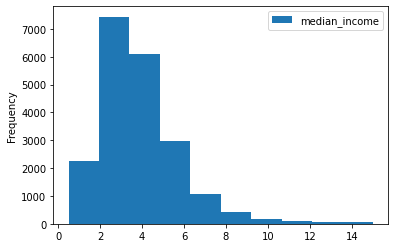

In [9]:
housing_data_frame[["median_income"]].plot(kind="hist")

In [10]:
import numpy as np
housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
            )

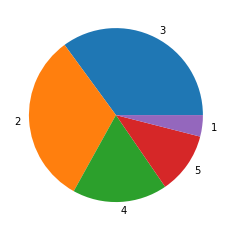

In [12]:
plt.pie(housing_data_frame.income_cat.value_counts(), labels=housing_data_frame.income_cat.value_counts().index)
plt.show()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data_frame, housing_data_frame["income_cat"]):
    print(train_index, test_index)

[17606 18632 14650 ... 13908 11159 15775] [ 5241 10970 20351 ...  4019 12107  2398]


In [15]:
train_df = housing_data_frame.loc[train_index]
test_df = housing_data_frame.loc[test_index]

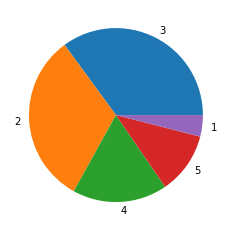

In [16]:
plt.pie(train_df.income_cat.value_counts(), labels=train_df.income_cat.value_counts().index)
plt.show()

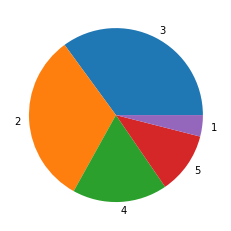

In [17]:
plt.pie(test_df.income_cat.value_counts(), labels=test_df.income_cat.value_counts().index)
plt.show()

In [24]:
housing_data_frame.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_cat            category
dtype: object

In [25]:
column = housing_data_frame.columns
column

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [27]:
# we only need a list of all data types. not like dtype('float64')
housing_data_frame.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
      dtype=object)

In [29]:
# so for that we use cusotom code
data_type = list(map(lambda x: str(x).replace("dtype('","").replace("')",""), housing_data_frame.dtypes.values ))
data_type

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [30]:
# to merge them both
dict(zip(column, data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}